<a href="https://colab.research.google.com/github/MAICHIVINH/BachHoaXanh/blob/master/02_3_Hybrid_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#from google.colab import files
#uploaded = files.upload()

In [25]:
!wget/trannn.jpg
!wget/qtran.jpg

/bin/bash: line 1: wget/trannn.jpg: No such file or directory
/bin/bash: line 1: wget/qtran.jpg: No such file or directory


In [26]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [27]:
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
    centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
    centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

    def gaussian(i,j):
        coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
        return 1 - coefficient if highPass else coefficient

    return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])

In [28]:
def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix

    return ifft2(ifftshift(filteredDFT))

In [29]:
def lowPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

def highPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))

In [30]:
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)

    return highPassed, lowPassed

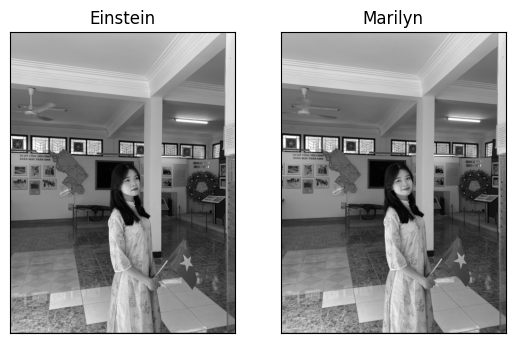

In [35]:
einstein = cv2.imread('/qtran.jpg')
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)

marilyn = cv2.imread('/qtrann.jpg')
marilyn = cv2.cvtColor(marilyn, cv2.COLOR_BGR2GRAY)


plt.subplot(121)
plt.imshow(einstein, cmap='gray')
plt.title('Einstein'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(marilyn, cmap='gray')
plt.title('Marilyn'), plt.xticks([]), plt.yticks([])

plt.show()

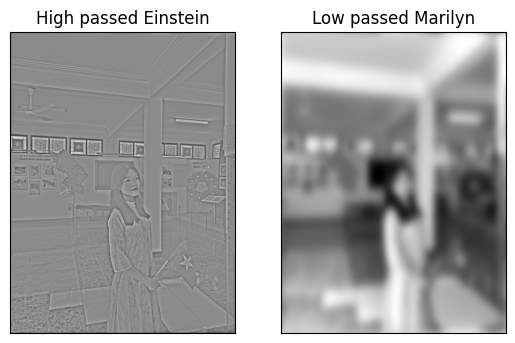

In [36]:
high, low = hybridImage(einstein, marilyn, 25, 10)

plt.subplot(121)
plt.imshow(np.real(high), cmap='gray')
plt.title('High passed Einstein'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(np.real(low), cmap='gray')
plt.title('Low passed Marilyn'), plt.xticks([]), plt.yticks([])

plt.show()

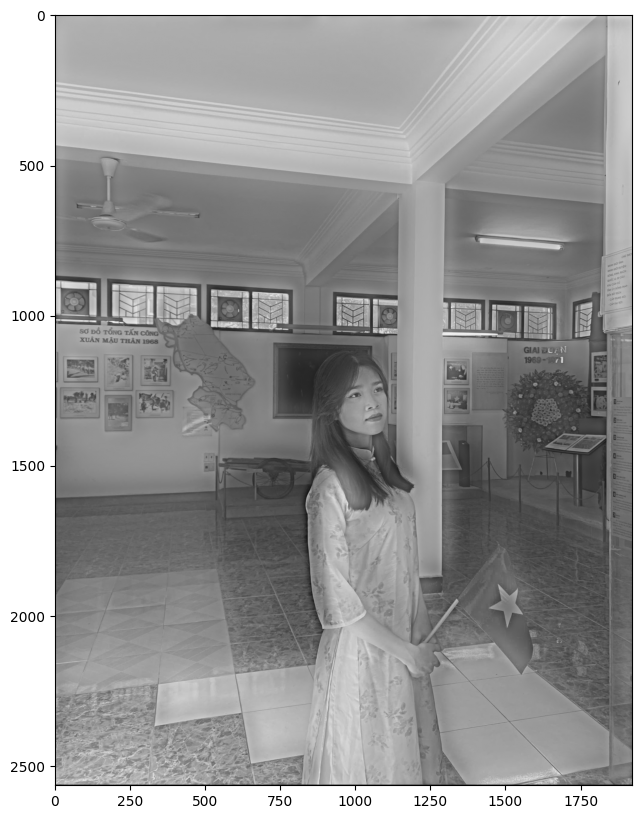

In [37]:
hybrid = high + low

plt.figure(figsize=(10,10))

plt.imshow(np.real(hybrid), cmap='gray')
plt.show()

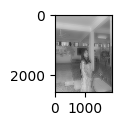

In [38]:
plt.figure(figsize=(1,1))

plt.imshow(np.real(hybrid), cmap='gray')
plt.show()